# COVID-19 dataset

This notebook aims to be a guide to analyze the COVID-19 dataset created by Johns Hopkins University.

In the notebook, you'll have several questions that you should answer using the dataset and the tools taught on the learning unit. Most questions are associated to one of the following topics:
- ***Polygraph*** - you have to confirm if a specific news is fake (or not)! Fake news buuusters
- ***Shooow time*** - sometimes it’s hard to make conclusions from looking at data but visualizations (charts) make it muuuuch easier ;-)
- ***Speedy quizzz*** - a question will prompted out in Zoom and your team will have 5 minutes to answer it... Run Forest, ruuuun!!
- ***Fortune telling*** - data analysis is really cool but what about predict the future? Isn’it niceeeer? :-D

To do it, we start with colabs notebook setup so we can use Google Colabs with 0-problems.

After the setup, the notebook is splitted in the following units:
- 

Next to it, some exploratory data analysis are perfomed to understand the dataset and some interesting visualizations related to the virus.

After it, we are ready to start defining and evaluating our models so we can generate our predictions.



In [ ]:
Upload the 'covid19.csv' and 'hackathome.py' you have in the same folder where we sent you this notebook. To do it click on "Upload" button you can find in the left pane at Google Colabs.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Unit 0 - Load dataset

#### **Import libraries**

- 'pandas' to handle data
- 'pyplot' to plot charts

In [3]:
# Code here:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### **Load dataset to a dataframe**

You already have the dataset with the name ***'dataset.csv'*** ready in the folder where this file is ;-)

Load the csv into a Pandas DataFrame

In [ ]:
# Code here:
df = pd.read_csv("./covid19.csv")

## Unit 1. First overview

In this chapter we do the first overview of the dataset and should make it (more) usable for the next steps.

#### **Check the head, tail and shape of the dataset**

In [5]:
# Code here:
df.head(5)

,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0


#### **Q1. What are the columns of the dataset?**

In [6]:
# Code here:
df.tail(5)

,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases
14240,Yemen,2020-04-03,0,0,0
14241,Yemen,2020-04-04,0,0,0
14242,Yemen,2020-04-05,0,0,0
14243,Yemen,2020-04-06,0,0,0
14244,Yemen,2020-04-07,0,0,0


##### **Q1.1. Rename the columns of the dataset to make it easier to work with.**
Use the follow dictionary to rename the columns:
```
{'Country/Region': 'country',
 'Date (yyyy/mm/dd)': 'date',
 'Confirmed cases': 'confirmed',
 'Death cases': 'deaths',
 'Recovered cases': 'recovered'
}
```

In [7]:
# Code here:
df = df.rename(columns={'Country/Region': 'country',
 'Date (yyyy/mm/dd)': 'date',
 'Confirmed cases': 'confirmed',
 'Death cases': 'deaths',
 'Recovered cases': 'recovered'
})

In [8]:
df.columns

Index(['country', 'date', 'confirmed', 'deaths', 'recovered'], dtype='object')

#### **Q2. What is the type of each column of the dataset?**

In [9]:
# Code here:
df.dtypes

country      object
date         object
confirmed     int64
deaths        int64
recovered     int64
dtype: object

##### **Q2.1. Change the type of the 'date' column to datetime.**

In [10]:
# Code here:
df["date"] = pd.to_datetime(df["date"])

df.dtypes

country              object
date         datetime64[ns]
confirmed             int64
deaths                int64
recovered             int64
dtype: object

#### **Q3. Do we have "nulls" in the dataset?**

In [11]:
# Code here:
df.isnull().sum()

country      0
date         0
confirmed    0
deaths       0
recovered    0
dtype: int64

#### **Q4. How many countries do we have represented in the dataset?**

In [12]:
# Code here:
df['country'].nunique()

185

#### **Q5. What is the first and the last 'date' of the dataset?**

In [13]:
# Code here:
df['date'].max()

Timestamp('2020-04-07 00:00:00')

In [14]:
df['date'].min()

Timestamp('2020-01-22 00:00:00')

## Unit 2. Data Analysis: Worldwide 

Time to make some worldwide analysis looking at global metrics and comparing countries.

#### **Q6. We checked before that we have data for 'confirmed', 'recovered' and 'deaths' cases but something is missing... Add the column for 'active' cases to the dataset.**

In [15]:
# Code here:
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

#### **Q7. Create a dataset that have the cumulative ACTIVE cases worldwide per day.**

In [16]:
# Code here:
total_cases = df.groupby('date')['active'].sum()
total_cases.head()

date
2020-01-22     510
2020-01-23     606
2020-01-24     879
2020-01-25    1353
2020-01-26    2010
Name: active, dtype: int64

![showtime](https://media.giphy.com/media/13ZVRnWnmSMaRy/giphy.gif)

***IT'S SHOOOOOOW TIME***

#### **Q8. Plot the curve with the evolution of the active cases worlwide.**

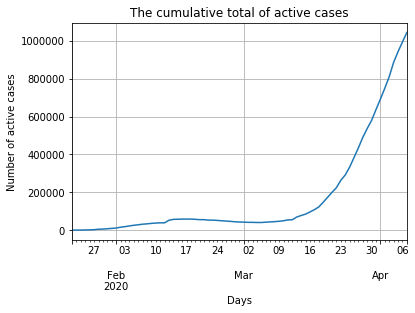

In [17]:
# Code here:
total_cases.plot()
plt.title('The cumulative total of active cases')
plt.ylabel('Number of active cases')
plt.grid()
plt.xlabel('Days')
plt.show()

#### **Q9. Get the top 10 countries by confirmed cases and plot a bar chart with the top 10 countries with more confirmed cases.**
> **Hint**: You can filter the dataset by the latest day of the dataset (it has the number of confirmed cases in each country). Then sort the values by 'confirmed' and use `head(10)` to get the top 10.

In [18]:
# Code here to get the top 10:
last_date_values = df[df['date'] == df['date'].max()]
last_values_top10 = last_date_values.sort_values(by='confirmed', ascending = False).head(10)
last_values_top10

,country,date,confirmed,deaths,recovered,active
12088,US,2020-04-07,396223,12722,21763,361738
10702,Spain,2020-04-07,141942,14045,43208,84689
6005,Italy,2020-04-07,135586,17127,24392,94067
4388,France,2020-04-07,110065,10343,19523,80199
4696,Germany,2020-04-07,107663,2016,36081,69566
2540,China,2020-04-07,82718,3335,77410,1973
5697,Iran,2020-04-07,62589,3872,27039,31678
11934,United Kingdom,2020-04-07,55949,6171,325,49453
11626,Turkey,2020-04-07,34109,725,1582,31802
11087,Switzerland,2020-04-07,22253,821,8704,12728


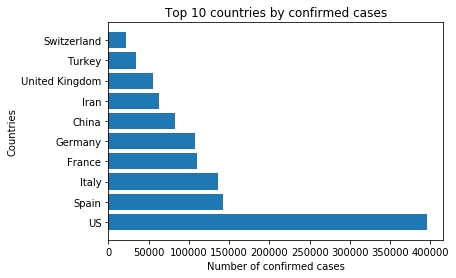

In [19]:
# Code here to plot the bar chart:
plt.barh(last_values_top10['country'], last_values_top10['confirmed'])
plt.xlabel('Number of confirmed cases')
plt.ylabel('Countries')
plt.title('Top 10 countries by confirmed cases')
plt.show()

#### **Q10. Calculate the recovery percentage and mortality rate for each country in latest day**

> **Hint:** Create a dataset with just the last date and create a column for each of the ratios we want:

In [20]:
# Code here:
rates = df[df['date'] == df['date'].max()]
rates['recovery percentage'] =  (rates['recovered'] / rates['confirmed']) * 100
rates['mortality rate'] =  (rates['deaths'] / rates['confirmed']) * 100
rates

,country,date,confirmed,deaths,recovered,active,recovery percentage,mortality rate
76,Afghanistan,2020-04-07,423,14,18,391,4.255319,3.309693
153,Albania,2020-04-07,383,22,131,230,34.203655,5.744125
230,Algeria,2020-04-07,1468,193,113,1162,7.697548,13.147139
307,Andorra,2020-04-07,545,22,39,484,7.155963,4.036697
384,Angola,2020-04-07,17,2,2,13,11.764706,11.764706
...,...,...,...,...,...,...,...,...
13936,Malawi,2020-04-07,8,1,0,7,0.000000,12.500000
14013,South Sudan,2020-04-07,2,0,0,2,0.000000,0.000000
14090,Western Sahara,2020-04-07,4,0,0,4,0.000000,0.000000
14167,Sao Tome and Principe,2020-04-07,4,0,0,4,0.000000,0.000000


![](https://media.giphy.com/media/rbaC8w0QY1vGw/giphy.gif)

##### **POLYGRAPH TIME!!!**

> ***BREAKING NEWS:***
> 
> *Netherlands has the highest recovery percentage in the world!*


##### **Q10.1. Is this a fake news?**

In [21]:
# Code here:
rates.sort_values(by = 'recovery percentage', ascending = False).head()

,country,date,confirmed,deaths,recovered,active,recovery percentage,mortality rate
2540,China,2020-04-07,82718,3335,77410,1973,93.583017,4.031771
3079,Diamond Princess,2020-04-07,712,11,619,82,86.938202,1.544944
6929,Liechtenstein,2020-04-07,78,1,55,22,70.512821,1.282051
7314,Maldives,2020-04-07,19,0,13,6,68.421053,0.000000
6467,"Korea, South",2020-04-07,10331,192,6694,3445,64.795276,1.858484


China has the highest recovery percentage in the world!

BOOOOOM, ONE MORE FAKE NEWS!! We hate those!!

## Unit 3. Data analysis - Country

From now on, you will only analyse one country that will attributed by your mentor.

For this chapter consider the following values of population (you need the value for your country population to make a further question):

In [22]:
population = {'US': 331002651,
              'Spain': 46754778,
              'Italy': 60461826,
              'Portugal': 10196709,
              'China': 1439323776,
              'United Kingdom': 67886011,
              'Germany': 83783942,
              'France': 65273511,
              'Norway': 5421241,
              'Iran': 83992949,
              'Belgium': 11589623,
              'Netherlands': 17134872}

### Attention: **The solution is assuming your country is Germany**!

#### **Q11. Get a dataset that contains only information regarding your country.**

In [23]:
# Code here:
my_country = 'Germany'
my_country_population = population[my_country]
my_country_df = df[df.country == my_country]

In [24]:
my_country_df.head()

,country,date,confirmed,deaths,recovered,active
4620,Germany,2020-01-22,0,0,0,0
4621,Germany,2020-01-23,0,0,0,0
4622,Germany,2020-01-24,0,0,0,0
4623,Germany,2020-01-25,0,0,0,0
4624,Germany,2020-01-26,0,0,0,0


#### **Q12. Create a dataset that only contains information since the day that was registered the first case in your country. Tell us what is that day and how many cases were registered in that day?**

In [25]:
# Code here:
my_country_df = my_country_df[my_country_df.confirmed > 0]
my_country_df[my_country_df.date == my_country_df.date.min()]

,country,date,confirmed,deaths,recovered,active
4625,Germany,2020-01-27,1,0,0,1


#### **Q13. Get a column with the confirmed cases in proportion to 1M of the population.**

In [26]:
# Code here:
my_country_df['confirmed_pop'] = ((my_country_df['confirmed'] / my_country_population) * 1000000)
my_country_df.head()

,country,date,confirmed,deaths,recovered,active,confirmed_pop
4625,Germany,2020-01-27,1,0,0,1,0.011935
4626,Germany,2020-01-28,4,0,0,4,0.047742
4627,Germany,2020-01-29,4,0,0,4,0.047742
4628,Germany,2020-01-30,4,0,0,4,0.047742
4629,Germany,2020-01-31,5,0,0,5,0.059677


#### **Q14. Get a column that register the number of days since the first case was registered per country.**

In [27]:
# Code here:
my_country_df['days'] = (my_country_df.date - my_country_df.date.min()).dt.days
my_country_df.head()

,country,date,confirmed,deaths,recovered,active,confirmed_pop,days
4625,Germany,2020-01-27,1,0,0,1,0.011935,0
4626,Germany,2020-01-28,4,0,0,4,0.047742,1
4627,Germany,2020-01-29,4,0,0,4,0.047742,2
4628,Germany,2020-01-30,4,0,0,4,0.047742,3
4629,Germany,2020-01-31,5,0,0,5,0.059677,4


![showtime](https://media.giphy.com/media/fxqt51CAMGITJlxcRI/giphy.gif)

***IT'S SHOOOOOOW TIME***

#### **Q15. Plot the cruve with evolution of confirmed cases per 1M of population since the 1st case for your country**

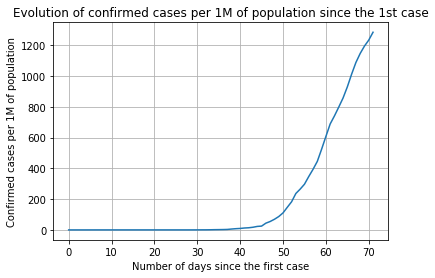

In [28]:
# Code here:
plt.plot(my_country_df.days, my_country_df.confirmed_pop)

plt.grid()
plt.xlabel('Number of days since the first case')
plt.ylabel('Confirmed cases per 1M of population')
plt.title('Evolution of confirmed cases per 1M of population since the 1st case')
plt.show()

#### **Q16. How does your country compares in terms of confirmed cases to others?**

Just run the code below and analyze the chart. Compare your country with others.

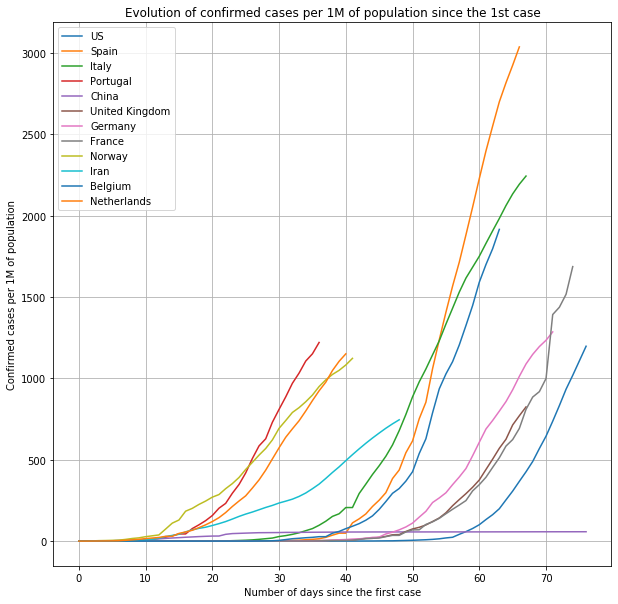

In [30]:
# Run this cell:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

population = {'US': 331002651, 'Spain': 46754778, 'Italy': 60461826, 'Portugal': 10196709, 'China': 1439323776,
              'United Kingdom': 67886011, 'Germany': 83783942, 'France': 65273511, 'Norway': 5421241,
              'Iran': 83992949, 'Belgium': 11589623, 'Netherlands': 17134872}

df_thorly = pd.read_csv('./covid19.csv')
df_thorly['Date (yyyy/mm/dd)'] = pd.to_datetime(df_thorly['Date (yyyy/mm/dd)'])
plt.figure(figsize=(10,10))

for country in population:
  country_df = df_thorly[df_thorly['Country/Region'] == country]
  country_df = country_df[country_df['Confirmed cases'] > 0]
  country_df['confirmed_pop'] = ((country_df['Confirmed cases'] / population[country]) * 1000000)
  country_df['days'] = (country_df['Date (yyyy/mm/dd)'] - country_df['Date (yyyy/mm/dd)'].min()).dt.days

  plt.plot(country_df.days, country_df.confirmed_pop, label = country)

plt.legend()
plt.grid()
plt.xlabel('Number of days since the first case')
plt.ylabel('Confirmed cases per 1M of population')
plt.title('Evolution of confirmed cases per 1M of population since the 1st case')
plt.show()

![](https://media.giphy.com/media/rbaC8w0QY1vGw/giphy.gif)

##### **POLYGRAPH TIME!!!**

> ***BREAKING NEWS:***
> 
> *Norway is one of the fastest countries to reach more cases by 1M population since the first case confirmation in the country!*


##### **Q16.1. Is this a fake news?**

*(There is no need to code in this question... Analyze the chart above)*

**WOOOOOW - A LEGIT NEWS! We like that!**

## Unit 4. Models train and evaluation
Here we will deal with models definition and we should be able to make predictions. There are a lot of models that can be used but we prefer to keep things simple for now... Use the models we explained in the learning unit.

![prediction](https://media.giphy.com/media/3o72F5tx9CEhSDxonC/giphy.gif)

#### Time to **fortune telling**!!!

this is model dataframe Index(['index', 0], dtype='object')
this is model dataframe Index(['confirmed', 'days'], dtype='object')


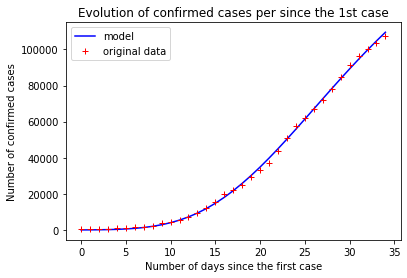

None

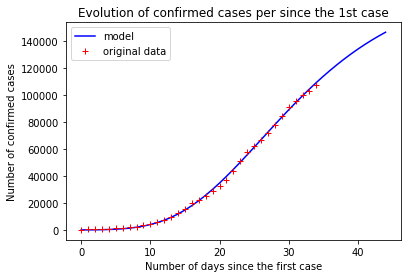

None

In [33]:
# Code here:

# import your model
from hackathome import Logistic, Gompertz, Exponential

# data about predictions
my_country = "Germany"
nr_days = 10

# instantiate your model
# Mentors: HERE YOU CAN CHOOSE THE MODEL - Exponential, Logistic or Gompertz.
# We added Logistic and Gompertz for this 2nd edition
model = Gompertz()

# select your country and after which number of confirmed cases
## ATTENTION: changed the after confirmation cases parameter to 100!!!
country = model.select_country(df, my_country, after_confirmation_cases=200)
## NOTE: If the results seems strange you might be using a value of after_confirmation_cases too high or too low

# fit your model
model.fit(country.days, country.confirmed)

# visualize how good it is
display(model.visualize_curve(country, predictions=False))

# predict for the next days
pred = model.predict(nr_days)

# visualize your predictions
display(model.visualize_curve(country, predictions=True))

In [ ]:
pred["country"] = my_country
predictions = pred[-nr_days:]
predictions.to_csv("./predictions_{}_10days.csv".format(my_country), index=False)

**Now you can get your file by opening the left pane and download it by click on mouse left button. After that, upload the file to the leaderboard using the instructions in the platform!**

## Finish challenge

![](https://media.giphy.com/media/lD76yTC5zxZPG/giphy.gif)

